# **Task 2**

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

In [1]:
#libraries for manipulate the data
import pandas as pd
import numpy as np

#libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#machine learning for modeliing
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

## **Access the drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Ganti dengan path dataset Anda di Google Drive
dataset_path = '/content/drive/MyDrive/Colab Notebooks/Dataset/customer_booking.csv'

# Baca dataset dengan pandas
df = pd.read_csv(dataset_path, encoding="ISO-8859-1")

## **Data Preparation**

In [4]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [5]:
df.shape

(50000, 14)

The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [7]:
# Columns to display unique values for
columns_to_display = ['sales_channel', 'trip_type', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_day', 'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration', 'booking_complete']

# Loop through columns and display unique values
for column in columns_to_display:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':\n {', '.join(map(str, unique_values))}")

Unique values in 'sales_channel':
 Internet, Mobile
Unique values in 'trip_type':
 RoundTrip, CircleTrip, OneWay
Unique values in 'purchase_lead':
 262, 112, 243, 96, 68, 3, 201, 238, 80, 378, 185, 8, 265, 245, 192, 259, 19, 67, 351, 228, 21, 23, 25, 16, 66, 51, 37, 101, 7, 5, 33, 20, 56, 13, 71, 346, 9, 65, 221, 107, 14, 77, 24, 47, 22, 11, 35, 272, 250, 161, 128, 190, 311, 27, 314, 102, 2, 26, 32, 57, 198, 120, 69, 281, 282, 15, 31, 316, 232, 156, 196, 283, 34, 63, 6, 227, 181, 138, 134, 85, 93, 118, 90, 168, 127, 18, 153, 186, 263, 172, 230, 42, 81, 140, 285, 179, 341, 173, 180, 366, 229, 174, 82, 75, 163, 105, 276, 110, 83, 154, 55, 45, 54, 193, 10, 166, 97, 239, 182, 99, 53, 28, 384, 70, 126, 142, 87, 86, 313, 41, 91, 206, 197, 268, 157, 145, 241, 139, 59, 396, 280, 79, 380, 132, 121, 419, 58, 115, 236, 225, 116, 191, 275, 417, 159, 92, 106, 218, 295, 12, 305, 235, 332, 125, 204, 310, 368, 169, 214, 155, 325, 130, 189, 226, 122, 88, 211, 188, 129, 149, 38, 194, 183, 40, 95, 135, 2

In [8]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [9]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [10]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [11]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

## **Exploratory Data Analysis**

In [12]:
# Specify categorical columns manually
categorical_columns = ['sales_channel', 'trip_type', 'flight_day', 'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals','booking_complete']
# Separate numeric columns
numeric_columns = ['purchase_lead',	'length_of_stay',	'flight_hour', 'flight_duration']

print("Numeric Columns:\n", numeric_columns)
print("Categorical Columns:\n", categorical_columns)

Numeric Columns:
 ['purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']
Categorical Columns:
 ['sales_channel', 'trip_type', 'flight_day', 'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'booking_complete']


### **Numeric columns**

### **Checking The Skewness**

In [13]:
# Calculate skewness for numerical features
skew_info = df[numeric_columns].skew().reset_index()
skew_info.columns = ['Feature', 'Skewness']

# Define a function to categorize skewness
def skew_type(skew):
    if skew > 1 or skew < -1:
        return 'Highly Skewed'
    elif abs(skew) <= 1:
        return 'Moderately Skewed'
    else:
        return 'Approximately Symmetric'

# Apply skewness type classification
skew_info['Skew Type'] = skew_info['Skewness'].apply(skew_type)

# Display the aggregated table
skew_info

,Feature,Skewness,Skew Type
0,purchase_lead,1.653035,Highly Skewed
1,length_of_stay,5.274743,Highly Skewed
2,flight_hour,0.396623,Moderately Skewed
3,flight_duration,-0.360080,Moderately Skewed


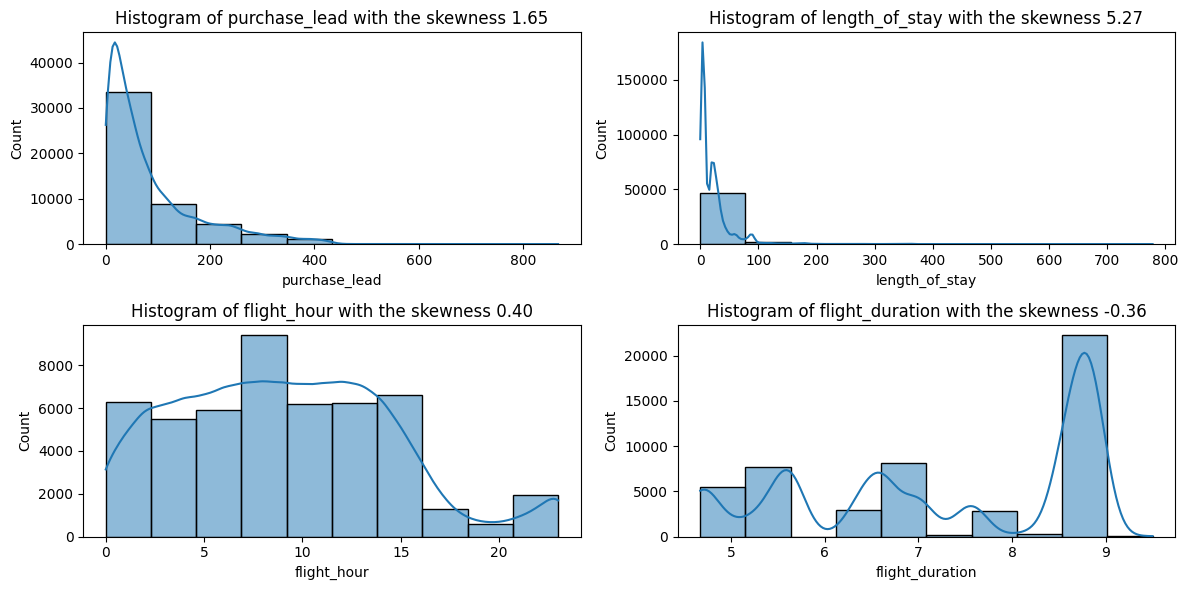

In [14]:
# Histograms for numeric columns
plt.figure(figsize=(12, 6))
for col in numeric_columns:
    plt.subplot(2, 2, numeric_columns.index(col) + 1)
    skewness = df[col].skew()
    sns.histplot(df[col], bins=10, kde=True)
    plt.title(f'Histogram of {col} with the skewness {skewness:.2f}')
plt.tight_layout()

plt.show()

### **Checking The Outlier**

In [15]:
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Determine outliers for each column
outliers = ((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR)))

# Count the number of outliers for each column
outliers_count = outliers.sum()
outliers_summary = pd.DataFrame({'Outlier Total': outliers_count})

# Define a function to classify outlier type
def outlier_type(value):
    if value == 0:
        return 'No Outlier'
    elif value <= 3:
        return 'Mild Outlier'
    elif value <= 6:
        return 'Moderate Outlier'
    else:
        return 'Severe Outlier'

# Apply outlier type classification
outliers_summary['Outlier Type'] = outliers_summary['Outlier Total'].apply(outlier_type)

# Display the outliers summary table
outliers_summary

,Outlier Total,Outlier Type
purchase_lead,3456,Severe Outlier
length_of_stay,3807,Severe Outlier
flight_hour,0,No Outlier
flight_duration,0,No Outlier


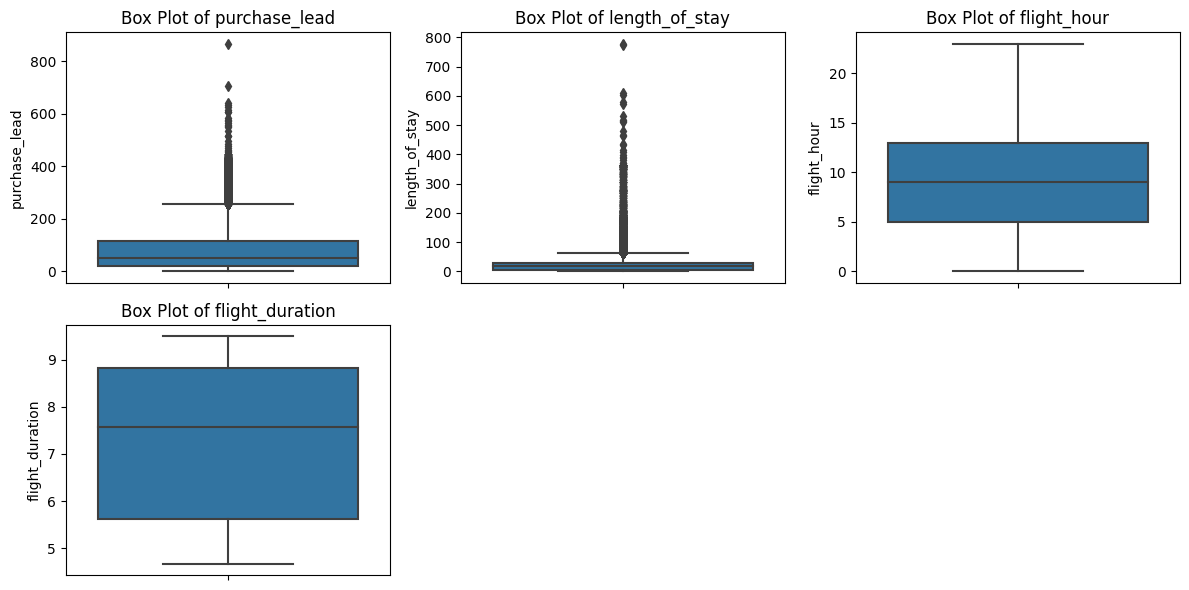

In [16]:
# Vertical Box plots for numeric columns
plt.figure(figsize=(12, 6))
for col in numeric_columns:
    plt.subplot(2, 3, numeric_columns.index(col) + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()

plt.show()

### **Log Transformation**

In [17]:
df['purchase_lead'] = np.log(df['purchase_lead'] + 1)  # Adding 1 to handle zeros
df['length_of_stay'] = np.log(df['length_of_stay'] + 1)  # Adding 1 to handle zeros

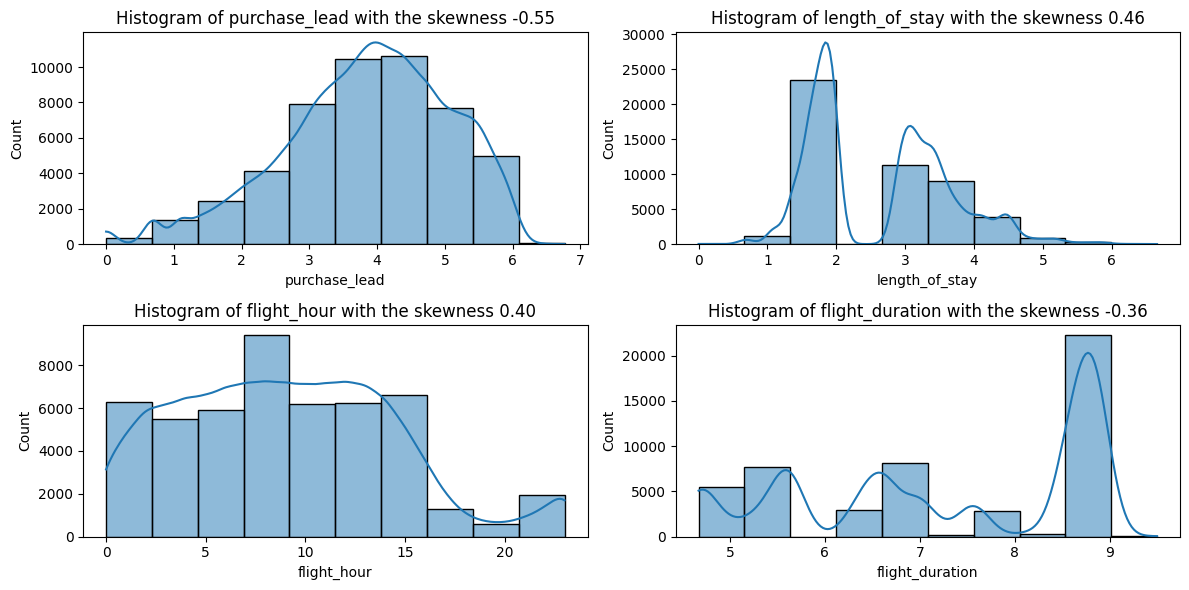

In [18]:
# Histograms for numeric columns
plt.figure(figsize=(12, 6))
for col in numeric_columns:
    plt.subplot(2, 2, numeric_columns.index(col) + 1)
    skewness = df[col].skew()
    sns.histplot(df[col], bins=10, kde=True)
    plt.title(f'Histogram of {col} with the skewness {skewness:.2f}')
plt.tight_layout()

plt.show()

### **Categorical Columns**

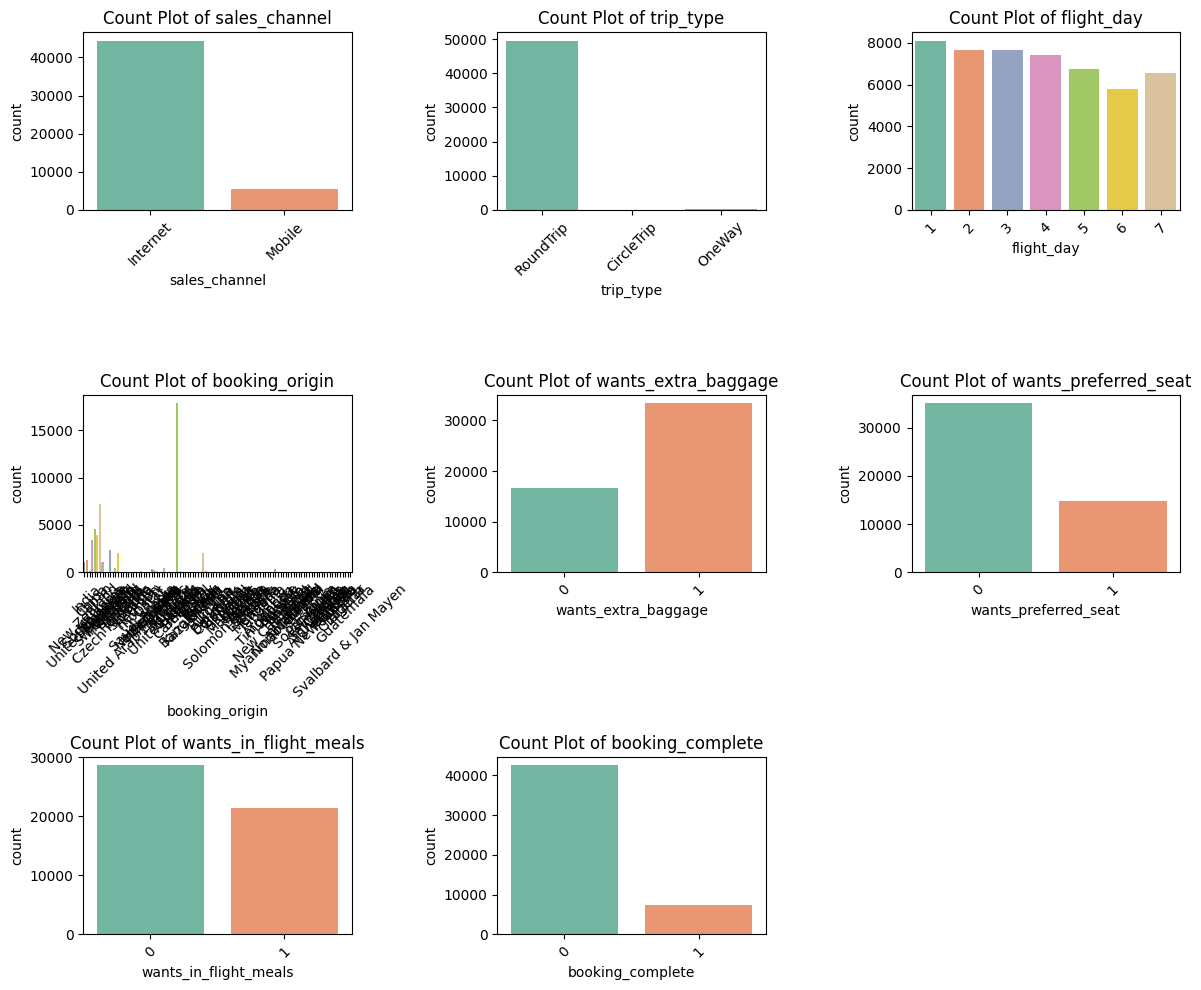

In [19]:
# Count plots for categorical columns
plt.figure(figsize=(12, 10))
for i, col in enumerate(categorical_columns):
    plt.subplot(3, 3, i + 1)
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **Data Preprocessing**

### **Checking The Duplicate Data**

In [20]:
# Check for duplicates in the DataFrame
for column in df.columns:
    duplicates = df[df.duplicated(subset=column, keep=False)]
    if df.duplicated().any():
      df.drop_duplicates(inplace=True)  # Remove any remaining duplicates in the entire DataFrame
      print("ℹ️ Duplicates found and removed in the entire DataFrame. Data is now clean.")

if not df.duplicated().any():
    print("🚀 No duplicate data found. Data is clean and ready for use!")

ℹ️ Duplicates found and removed in the entire DataFrame. Data is now clean.
🚀 No duplicate data found. Data is clean and ready for use!


### **Feature Engineering**

In [21]:
# Interaction between 'purchase_lead' and 'length_of_stay'
df['purchase_lead_length_of_stay_interaction'] = df['purchase_lead'] * df['length_of_stay']

# Binning 'flight_hour' into categories
df['flight_hour_bin'] = pd.cut(df['flight_hour'], bins=3, labels=['morning', 'afternoon', 'evening'])

### **Scaling the Numerical Feature**

In [22]:
scaler = StandardScaler()
df[['purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']] = scaler.fit_transform(df[['purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']])

In [23]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,purchase_lead_length_of_stay_interaction,flight_hour_bin
0,2,Internet,RoundTrip,1.399995,0.363041,-0.382535,6,AKLDEL,New Zealand,1,0,0,-1.176158,0,16.692682,morning
1,1,Internet,RoundTrip,0.715228,0.411589,-1.121490,6,AKLDEL,New Zealand,0,0,0,-1.176158,0,14.392638,morning
2,2,Internet,RoundTrip,1.339212,0.502108,1.464855,3,AKLDEL,India,1,1,0,-1.176158,0,17.236339,evening
3,1,Internet,RoundTrip,0.591468,0.830709,-0.936751,6,AKLDEL,New Zealand,0,0,1,-1.176158,0,15.854740,morning
4,2,Internet,RoundTrip,0.315375,0.502108,1.095377,3,AKLDEL,India,1,0,1,-1.176158,0,13.276016,afternoon


### **Encoding the categorical data**

In [24]:
# Define your features (X) and target variable (y)
X = df.drop(columns=['booking_complete'])  # Features
y = df['booking_complete']  # Target variable

# Perform one-hot encoding for categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [25]:
X_encoded.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,purchase_lead_length_of_stay_interaction,...,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam,flight_hour_bin_afternoon,flight_hour_bin_evening
0,2,1.399995,0.363041,-0.382535,6,1,0,0,-1.176158,16.692682,...,0,0,0,0,0,0,0,0,0,0
1,1,0.715228,0.411589,-1.121490,6,0,0,0,-1.176158,14.392638,...,0,0,0,0,0,0,0,0,0,0
2,2,1.339212,0.502108,1.464855,3,1,1,0,-1.176158,17.236339,...,0,0,0,0,0,0,0,0,0,1
3,1,0.591468,0.830709,-0.936751,6,0,0,1,-1.176158,15.854740,...,0,0,0,0,0,0,0,0,0,0
4,2,0.315375,0.502108,1.095377,3,1,0,1,-1.176158,13.276016,...,0,0,0,0,0,0,0,0,1,0


## **Create the Machine Learning**

### **Model Process**

In [26]:
# Define a list of machine learning models to compare
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42))
]

# Iterate through the models and evaluate their performance
for model_name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"Model Accuracy: {accuracy:.2f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)
    print("=" * 50)

Model: Random Forest
Model Accuracy: 0.85
Confusion Matrix:
[[8235  143]
 [1330  149]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      8378
           1       0.51      0.10      0.17      1479

    accuracy                           0.85      9857
   macro avg       0.69      0.54      0.54      9857
weighted avg       0.81      0.85      0.81      9857

Model: Logistic Regression
Model Accuracy: 0.85
Confusion Matrix:
[[8243  135]
 [1382   97]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      8378
           1       0.42      0.07      0.11      1479

    accuracy                           0.85      9857
   macro avg       0.64      0.52      0.51      9857
weighted avg       0.79      0.85      0.80      9857

Model: Gradient Boosting
Model Accuracy: 0.85
Confusion Matrix:
[[8351   27]
 [1441   38]]
Classification Report:
      

Based on the evaluation results of the three machine learning models (Random Forest, Logistic Regression, and Gradient Boosting) on the dataset.

* All three models achieved similar overall accuracy of approximately 85%.
* Random Forest had the highest F1-score for class 0 (booking not complete), * indicating good performance in predicting non-bookings.
* Logistic Regression had the highest recall for class 0, indicating a high ability to correctly identify non-bookings.
* Gradient Boosting had the highest precision for class 1 (booking complete), suggesting that when it predicts a booking, it is often correct.

Choosing the best model depends on your specific goals and priorities. If correctly predicting non-bookings (class 0) is more critical, Random Forest or Logistic Regression may be preferred due to their higher F1-scores for class 0 and recall. If precision for bookings (class 1) is crucial and you can tolerate a lower recall, Gradient Boosting may be a suitable choice.

## **Feature importance**

Feature importance helps us understand which features had the most influence on the model's predictions. Let's visualize the feature importances:

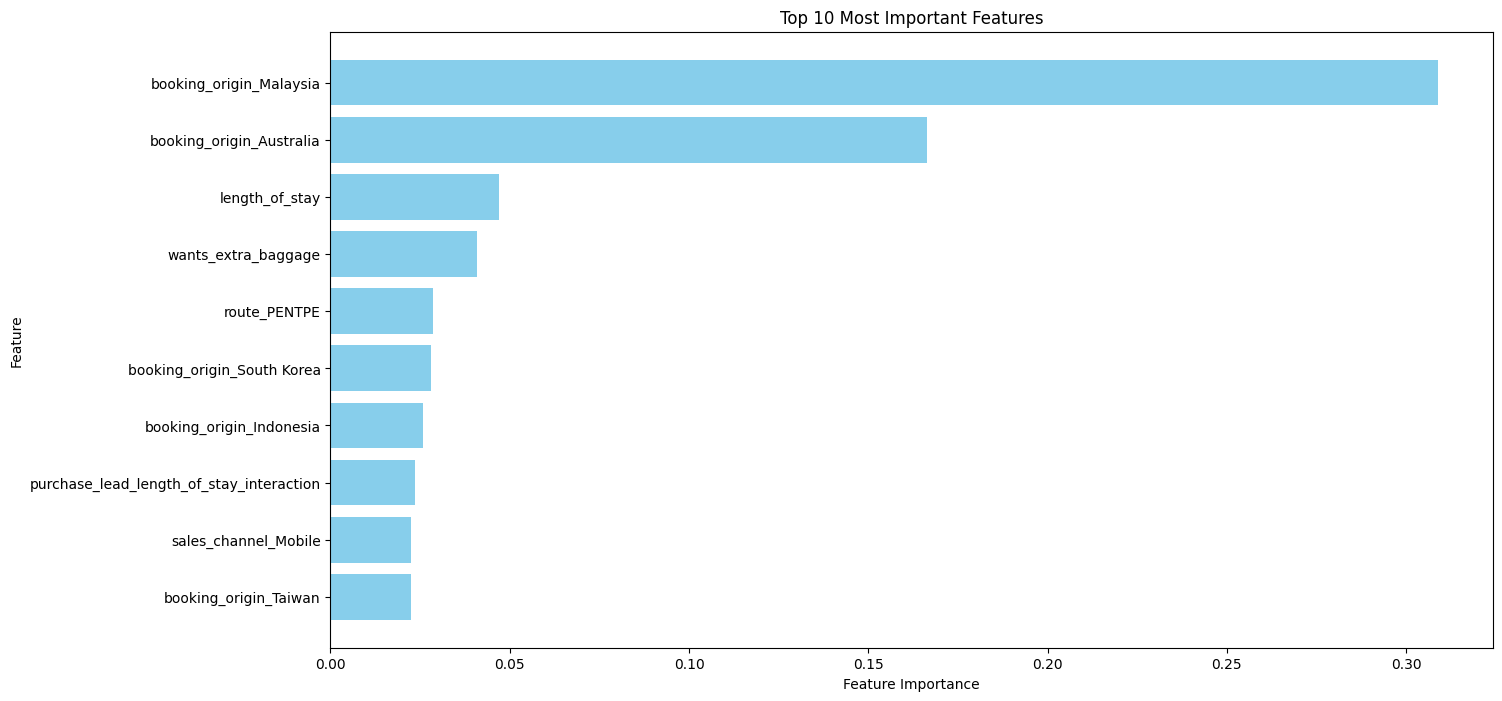

In [27]:
# Fit the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Get feature importances
feature_importance = gb_model.feature_importances_

# Get the names of the features
feature_names = X_encoded.columns

# Sort feature importances in descending order
sorted_idx = np.argsort(feature_importance)[::-1]

# Plot the top 10 most important features
top_features = 10
plt.figure(figsize=(15, 8))
plt.title("Top 10 Most Important Features")
plt.barh(range(top_features), feature_importance[sorted_idx][:top_features], color='skyblue')
plt.yticks(range(top_features), np.array(feature_names)[sorted_idx][:top_features])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features at the top
plt.show()